# Random forests

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

import sklearn
print(f"sklearn version: {sklearn.__version__}")

import sys
print(f"Python version: {sys.version}")

pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.26.4
sklearn version: 1.1.3
Python version: 3.9.21 (main, Dec 11 2024, 10:23:52) 
[Clang 14.0.6 ]


### Import data

In [2]:
players_all = pd.read_csv('../games_by_players_all.csv', encoding='utf8')
players_ranked = pd.read_csv('../games_by_players_ranked.csv', encoding='utf8')
players_pro = pd.read_csv('../games_by_players_pro.csv', encoding='utf8')

teams_all = pd.read_csv('../games_by_team_all_added_features.csv', encoding='utf8')
teams_ranked = pd.read_csv('../games_by_team_ranked_added_features.csv', encoding='utf8')
teams_pro = pd.read_csv('../games_by_team_pro_added_features.csv', encoding='utf8')

small_file = pd.read_csv('../small_csv_file.csv', encoding='utf8')

In [3]:
print(players_all['winner'].value_counts(normalize=True))

winner
True     0.501909
False    0.498091
Name: proportion, dtype: float64


In [4]:

players_all = players_all.drop(columns = ['game_id', 'player_tag', 'pro'])
players_ranked = players_ranked.drop(columns = ['game_id', 'player_tag', 'pro'])
players_pro = players_pro.drop(columns = ['game_id', 'player_tag', 'pro'])

small_file = small_file.drop(columns = ['game_id', 'player_tag', 'pro'])


# Team
teams_all = teams_all.drop(columns = ['pro'])
teams_ranked = teams_ranked.drop(columns = ['pro'])
teams_pro = teams_pro.drop(columns = ['pro'])


In [5]:
players_all.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,26.72,83.53,16.47,75.83,24.17,31.88,28.71,39.66,28.51,False
1,1410.0,474841.0,41.74,122.11,208.83,248.88,115.01,8.80,5.41,30.0,...,24.45,79.52,20.48,67.56,32.44,31.06,36.93,31.49,32.85,False
2,1355.0,465999.0,35.87,119.38,223.64,212.03,145.07,21.79,7.24,36.0,...,26.17,80.77,19.23,67.72,32.28,37.22,32.79,27.29,38.78,False
3,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,29.87,54.02,45.98,77.37,22.63,28.14,44.34,41.22,29.30,True
4,1518.0,521069.0,50.22,149.49,179.09,241.24,128.04,9.51,3.34,32.0,...,35.38,61.49,38.51,79.66,20.34,29.56,30.44,30.15,34.75,True


In [6]:
teams_all.head()

,movement_avg_speed_1,movement_total_distance_1,movement_time_supersonic_speed_1,movement_time_boost_speed_1,movement_time_slow_speed_1,movement_time_ground_1,movement_time_low_air_1,movement_time_high_air_1,movement_time_powerslide_1,movement_count_powerslide_1,...,avg_positioning_time_most_back,max_movement_percent_high_air,min_movement_percent_high_air,var_movement_percent_high_air,avg_movement_percent_high_air,max_movement_percent_supersonic_speed,min_movement_percent_supersonic_speed,var_movement_percent_supersonic_speed,avg_movement_percent_supersonic_speed,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,117.70,5.75,2.36,1.92,4.07,11.20,9.47,0.52,10.44,False
1,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,119.37,6.33,0.66,5.57,3.17,13.26,6.27,8.49,10.18,True
2,1430.0,561540.0,50.30,150.27,216.30,217.17,177.03,22.67,11.74,103.0,...,132.60,5.44,3.86,0.45,4.78,14.12,7.32,8.11,11.17,True
3,1559.0,609572.0,66.07,166.44,181.22,237.20,165.62,10.91,11.98,120.0,...,133.23,5.50,2.64,1.37,4.14,15.97,7.48,12.22,11.40,False
4,1486.0,486636.0,27.96,145.74,177.11,218.76,123.81,8.24,7.00,62.0,...,114.97,6.45,1.25,5.01,3.35,11.70,7.29,3.76,8.99,False


### X,y division

In [7]:
X_players_all = players_all.iloc[:, 0:44]
X_players_ranked = players_ranked.iloc[:, 0:44]
X_players_pro = players_pro.iloc[:, 0:44]
X_small_file = small_file.iloc[:, 0:44]

In [8]:
y_players_all = players_all.iloc[:, 44]
y_players_ranked = players_ranked.iloc[:, 44]
y_players_pro = players_pro.iloc[:, 44]
y_small_file = small_file.iloc[:, 44]

In [9]:
# team
X_teams_all = teams_all.iloc[:, 0:200]
X_teams_ranked = teams_ranked.iloc[:, 0:200]
X_teams_pro = teams_pro.iloc[:, 0:200]

In [10]:
# Team
y_teams_all = teams_all.iloc[:, 200]
y_teams_ranked = teams_ranked.iloc[:, 200]
y_teams_pro = teams_pro.iloc[:, 200]

### Train-test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_players_pro, y_players_pro, random_state=20, test_size=0.2)

# Model 1 -----------------------------------------------

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
# random forests model
rf = RandomForestClassifier(n_estimators=500,
                             min_samples_split=10)

In [16]:
#40 sec voor individueel / 55 sec voor teams / nu 7 min met extra HP / 4 min

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=500)

## Scores

In [18]:
y_pred = rf.predict(X_test)

In [19]:
rf.score(X_test, y_test)

0.7528036719822079

### F1 enzoo metrics

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.76      0.75      0.75     10728
        True       0.74      0.76      0.75     10405

    accuracy                           0.75     21133
   macro avg       0.75      0.75      0.75     21133
weighted avg       0.75      0.75      0.75     21133



In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [23]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7528036719822079
recall 0.7575204228736184
precision 0.7447793631295474
f1 0.7510958643034115


## Conf matrix

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
print(confusion_matrix(y_test, y_pred))

[[8027 2701]
 [2523 7882]]


[[8027 2701]
 [2523 7882]]
0.7528036719822079


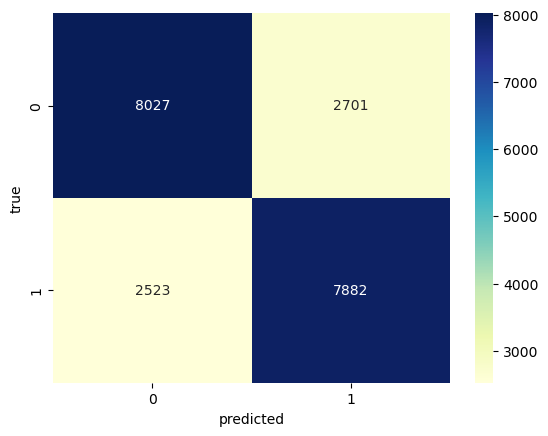

In [26]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()

## ROC curve

[0.67826853 0.94143127 0.16561145 0.10918045 0.38864103 0.94668334
 0.09181948 0.36714919 0.64861665 0.19043398 0.45727814 0.68545207
 0.6399921  0.41733287 0.77949255 0.63999119 0.94147692 0.69806916
 0.07878862 0.70474438 0.2028483  0.94408642 0.75043329 0.38031887
 0.25508678 0.5779516  0.04607346 0.71432547 0.72701828 0.88781483
 0.17744438 0.87179966 0.7209555  0.57701107 0.53934889 0.88442515
 0.81273187 0.20311879 0.97222011 0.11612521 0.44252695 0.4960682
 0.60318889 0.14115398 0.45673814 0.25744837 0.78730302 0.43924415
 0.38667169 0.66198846 0.40371149 0.40409298 0.7617082  0.33708237
 0.58188455 0.1740002  0.46490654 0.85953436 0.05277542 0.12517536
 0.24471787 0.64894579 0.06288403 0.20358904 0.67337686 0.14920547
 0.09880302 0.18702147 0.56104063 0.62584235 0.13799667 0.42707955
 0.91273714 0.39095933 0.11346927 0.64516158 0.65062163 0.24009803
 0.44073851 0.74935542 0.79325336 0.66020694 0.52630259 0.68498585
 0.95389134 0.94575332 0.03193004 0.53477964 0.28731268 0.97339

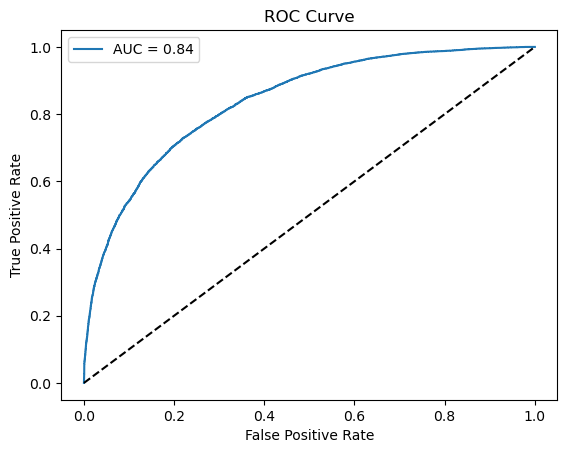

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Imporant features

In [28]:
features = pd.DataFrame(rf.feature_importances_, index = X_train.columns)

In [29]:
features.sort_values(0, ascending=False)

,0
positioning_percent_infront_ball,0.097989
positioning_percent_behind_ball,0.091815
positioning_time_infront_ball,0.073412
positioning_time_behind_ball,0.042279
positioning_percent_most_forward,0.039908
positioning_time_most_forward,0.036691
positioning_avg_distance_to_ball_possession,0.031919
positioning_percent_most_back,0.030368
positioning_time_most_back,0.029521
positioning_time_offensive_third,0.020524


In [30]:
correlations = pd.DataFrame(X_train.corrwith(y_train))
correlations.sort_values(0, ascending=False)

,0
positioning_percent_behind_ball,0.418290
positioning_avg_distance_to_ball_possession,0.173905
positioning_percent_offensive_half,0.170828
positioning_percent_offensive_third,0.158610
positioning_time_behind_ball,0.157189
positioning_time_offensive_third,0.140912
positioning_time_offensive_half,0.137616
positioning_avg_distance_to_mates,0.120375
positioning_avg_distance_to_ball,0.119124
positioning_percent_neutral_third,0.105055


## statistics

In [31]:
# average for winners and average for losers
X_train['positioning_percent_behind_ball'].groupby(y_train).mean()


winner
False    69.978273
True     74.174662
Name: positioning_percent_behind_ball, dtype: float64

In [32]:
# average for winners and average for losers
X_train['positioning_percent_infront_ball'].groupby(y_train).mean()

winner
False    30.021726
True     25.825339
Name: positioning_percent_infront_ball, dtype: float64

In [33]:
# average for winners and average for losers
X_train['positioning_percent_offensive_half'].groupby(y_train).mean()

winner
False    34.057017
True     36.425687
Name: positioning_percent_offensive_half, dtype: float64

In [34]:
# average for winners and average for losers
X_train['positioning_percent_defensive_half'].groupby(y_train).mean()

winner
False    65.942983
True     63.574311
Name: positioning_percent_defensive_half, dtype: float64

# Model 2 -------------------------------

## Model

In [35]:
rf2 = RandomForestClassifier(n_estimators=500,
                             criterion='entropy',
                             min_samples_split=10,
                             max_depth = 14,
                             random_state = 42
)

In [36]:
#13 min de volgende / 8 min voor team / 4 op blauwe laptop

In [37]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=500, random_state=42)

## Scores

In [38]:
y_pred2 = rf2.predict(X_test)

In [39]:
rf2.score(X_test, y_test)

0.7515733686651209

In [40]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.76      0.75      0.75     10728
        True       0.74      0.76      0.75     10405

    accuracy                           0.75     21133
   macro avg       0.75      0.75      0.75     21133
weighted avg       0.75      0.75      0.75     21133



In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [42]:
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7515733686651209
recall 0.7570398846708313
precision 0.7431833191810548
f1 0.7500476099790516


In [43]:
from sklearn.metrics import accuracy_score

In [44]:
y_pred2 = rf2.predict(X_test)
y_pred_classes2 = y_pred2
y_test_classes2 = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes2, y_pred_classes2))

DNN Accuracy: 0.7515733686651209


### Conf matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
print(confusion_matrix(y_test, y_pred2))

[[8006 2722]
 [2528 7877]]


[[8006 2722]
 [2528 7877]]
0.7515733686651209


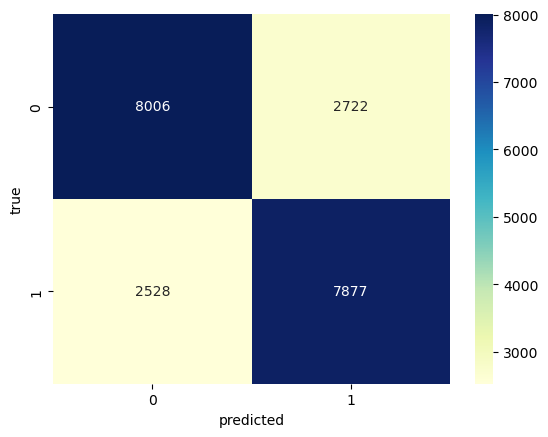

In [47]:
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


### roc score

[0.74142325 0.92909305 0.09717954 0.11246872 0.36062946 0.89774625
 0.09610184 0.35120649 0.66496974 0.18161592 0.46845829 0.72017213
 0.604198   0.4304463  0.82568797 0.61865287 0.93387753 0.70936397
 0.06236171 0.71188501 0.21447282 0.95346059 0.72258374 0.36390125
 0.24875929 0.51312999 0.02887275 0.66055304 0.75342043 0.91736177
 0.13869258 0.8498364  0.71255101 0.55807616 0.57333491 0.90464201
 0.84469082 0.2355617  0.93695133 0.12220907 0.47710555 0.52631221
 0.69979743 0.09120135 0.4463299  0.10151838 0.73876865 0.46109322
 0.35592139 0.63258063 0.33385765 0.39120013 0.76594566 0.31400257
 0.58494418 0.17381879 0.46421439 0.89326921 0.06867059 0.16180589
 0.23756196 0.74327571 0.07464494 0.15749442 0.66603441 0.11312893
 0.08208524 0.08621703 0.5213359  0.63602368 0.15739768 0.41431953
 0.93767899 0.41222455 0.06068897 0.64803327 0.68734363 0.25269891
 0.39399229 0.76928844 0.90085965 0.62702143 0.51544006 0.68718032
 0.96447967 0.94492445 0.03834068 0.54469032 0.23501327 0.9473

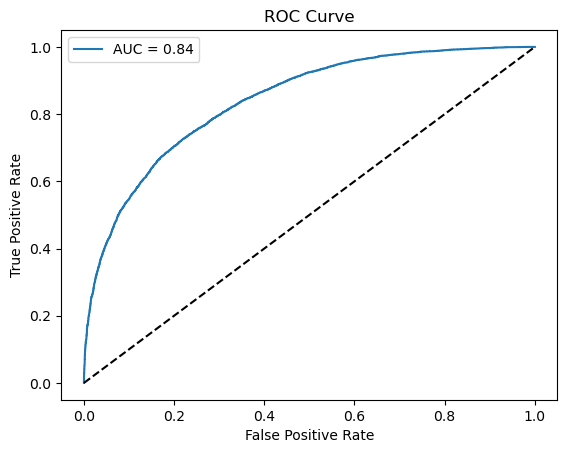

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Important features

In [51]:
features = pd.DataFrame(rf2.feature_importances_, index = X_train.columns)

In [52]:
features.sort_values(0, ascending=False)

,0
positioning_percent_behind_ball,0.116245
positioning_percent_infront_ball,0.113631
positioning_time_infront_ball,0.080148
positioning_time_behind_ball,0.047209
positioning_percent_most_forward,0.046953
positioning_time_most_forward,0.041250
positioning_avg_distance_to_ball_possession,0.033801
positioning_percent_most_back,0.032842
positioning_time_most_back,0.032151
positioning_time_offensive_third,0.020514
